In [56]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [57]:
data={}
conv_progress = {}
x={}
y={}
conv={}
accp={}
sol={}

In [58]:
#upload all percentages
technique = "abc"
sparseness = "0"
directory = f"./{technique}_{sparseness}"
#Over folders
for folder in os.listdir(directory):
    if not folder.startswith('.'):
        new_dir = directory+"/"+folder
        if os.path.isdir(new_dir):
            for filename in os.listdir(new_dir):
                if filename.endswith(".pkl"):
                    f = new_dir+"/"+filename

                    key = filename.split('_')[:2]
                    key = "_".join(key)

                    with open(f, "rb") as file:
                         info = pickle.load(file)
                        
                    seed = info["Model_info"]["parameters"]["seed"]

                    try:
                        data[seed][key] = info
                    except KeyError:
                        data[seed] = {key: info}
                

In [59]:
data[1]["abc_0"]["Optimal_solution"]

{'graph_structure': {0: 15988.217866941304},
 'Distance': {0: 13.613151610226183},
 'round': {0: 15988.0}}

In [60]:
for seed, abc in data.items():
    conv_progress[seed] = data[seed]["abc_0"]["Convergence"]["progress"]
    x[seed] = [int(k) for k in conv_progress[seed].keys()]
    y[seed] = [v["GR"][0] for k,v in conv_progress[seed].items()]
    conv[seed] = [v["converged"] for k,v in conv_progress[seed].items()]
    accp[seed] = data[seed]["abc_0"]["Acceptance_rate"]
    sol[seed] = data[seed]["abc_0"]["Optimal_solution"]

Text(0.5, 1.0, 'Convergence for ABC')

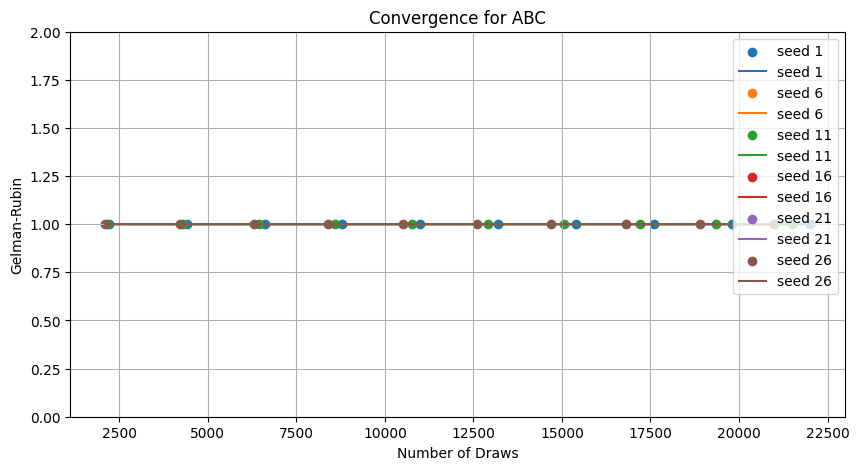

In [61]:
plt.figure(figsize=(10,5))
plt.grid()
#automatically generate plot!! 
for (k,v), (kk,vv) in zip(x.items(), y.items()):
    plt.scatter(v, vv, label="seed "+str(k))
    plt.plot(v, vv, label="seed "+str(k))
    
plt.legend()
plt.xlabel("Number of Draws")
plt.ylabel("Gelman-Rubin")
plt.ylim(0,2)
plt.title("Convergence for ABC")

[True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, False, False, False]
[True, True, True, True, True, True, True, True, True, True]
[False, False, False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False, False]
[True, True, True, True, True, True, True, True, True, True]


Text(0.5, 1.0, 'Convergence for ABC')

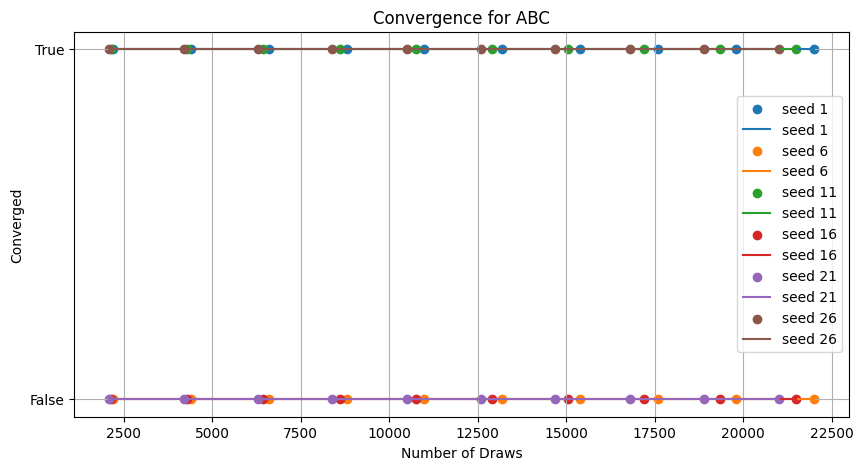

In [62]:
plt.figure(figsize=(10,5))
plt.grid()
#automatically generate plot!! 
for (k,v), (kk,vv) in zip(x.items(), conv.items()): 
    print(vv)
    plt.scatter(v, vv, label="seed "+str(k))
    plt.plot(v, vv, label="seed "+str(k))
    
plt.legend()
plt.xlabel("Number of Draws")
plt.ylabel("Converged")
plt.yticks([0,1],[False,True])
plt.title("Convergence for ABC")

Text(0.5, 1.0, 'Acceptance Rate per Seed of ABC')

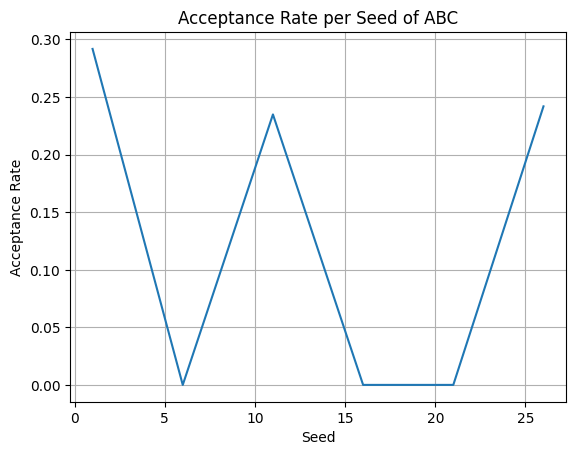

In [63]:
#Acceptance percentage
plt.grid()
plt.plot(accp.keys(), accp.values())

plt.xlabel("Seed")
plt.ylabel("Acceptance Rate")
plt.title("Acceptance Rate per Seed of ABC")

# Get decision variables

In [64]:
dec_var = {}
dist = {}
for seed, value in sol.items():
    for name, v in value.items():
        if "min_distance" in name:
            dist[seed] = list(v.values())[0]
        else:
            dec_var[seed] = list(v.values())[0]
#list(sol["5"]["Manufacturing_Time"].values())[0]

In [65]:
dec_var

{1: 15988.0, 6: 0.0, 11: 0.0, 16: 34589.0, 21: 0.0, 26: 11.0}

Text(0.5, 1.0, 'Decision Variable per Seed of ABC')

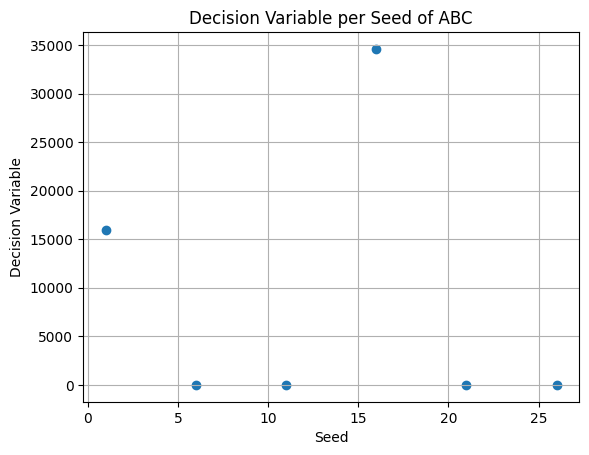

In [66]:
#Acceptance percentage
plt.grid()
plt.scatter(dec_var.keys(), dec_var.values())

plt.xlabel("Seed")
plt.ylabel("Decision Variable")
plt.title("Decision Variable per Seed of ABC")

# Get convergence data frame

In [14]:
for k,v in conv_progress.items():
    df_seed = pd.DataFrame.from_dict(v, orient = "index").style.set_caption("Convergence progress for seed "+str(k))
    display(df_seed)

,GR,converged
2200,[0.99997521],True
4400,[1.00015264],True
6600,[0.99992814],True
8800,[0.99994945],True
11000,[0.99995938],True
13200,[0.99996605],True
15400,[0.99999247],True
17600,[0.99997208],True
19800,[0.99997499],True
22000,[0.99997745],True


,GR,converged
2200,[nan],False
4400,[nan],False
6600,[nan],False
8800,[nan],False
11000,[nan],False
13200,[nan],False
15400,[nan],False
17600,[nan],False
19800,[nan],False
22000,[nan],False


,GR,converged
2150,[1.00013607],True
4300,[0.99989742],True
6450,[0.99992609],True
8600,[0.99996858],True
10750,[0.9999553],True
12900,[0.99996144],True
15050,[0.99996697],True
17200,[0.99997143],True
19350,[0.99997458],True
21500,[0.99997947],True


,GR,converged
2150,[4.29247739e+14],False
4300,[4.29247739e+14],False
6450,[4.29247739e+14],False
8600,[4.29247739e+14],False
10750,[4.29247739e+14],False
12900,[4.29247739e+14],False
15050,[4.29247739e+14],False
17200,[4.29247739e+14],False
19350,[4.29247739e+14],False
21500,[4.29247739e+14],False


,GR,converged
2100,[nan],False
4200,[nan],False
6300,[nan],False
8400,[nan],False
10500,[nan],False
12600,[nan],False
14700,[nan],False
16800,[nan],False
18900,[nan],False
21000,[nan],False


,GR,converged
2100,[1.00065931],True
4200,[0.99994336],True
6300,[0.99992934],True
8400,[0.99994645],True
10500,[0.9999576],True
12600,[0.99996196],True
14700,[0.99996733],True
16800,[0.99997138],True
18900,[0.99997628],True
21000,[0.99998452],True


# All ABC

In [18]:
data[1]["abc_0"]["Results"]["graph_structure"]

{0: 16767.36138161739,
 1: 16767.36138161739,
 2: 16767.36138161739,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 15988.217866941304,
 17: 15988.217866941304,
 18: 15988.217866941304,
 19: 15988.217866941304,
 20: 15988.217866941304,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 1.6243453636632417e-12,
 36: 3.2486907273264834e-12,
 37: 4.873036090989725e-12,
 38: 6.497381454652967e-12,
 39: 8.121726818316209e-12,
 40: 9.74607218197945e-12,
 41: 1.1370417545642691e-11,
 42: 1.2994762909305932e-11,
 43: 1.4619108272969175e-11,
 44: 1.6243453636632417e-11,
 45: 1.786779900029566e-11,
 46: 1.9492144363958903e-11,
 47: 2.1116489727622146e-11,
 48: 2.2740835091285388e-11,
 49: 2.2740835091285388e-11,
 50: 2.436518045494863e-11,
 51: 2.436518045494863e-11,
 52: 2.5989525818611874e-11,
 53: 2.5989525818611874e-11,


In [21]:
data[1]["abc_0"]["Results"]["Distance"]

{0: 14.045271754762158,
 1: 14.0703978862761,
 2: 14.228034696263983,
 3: 15.664315783653329,
 4: 16.537509660991145,
 5: 16.602046358349487,
 6: 15.812972035910565,
 7: 16.600069599398136,
 8: 15.558159131884278,
 9: 16.378996085728467,
 10: 16.006351341762947,
 11: 15.570502954521416,
 12: 16.807603979613347,
 13: 15.447814180494841,
 14: 16.305061369183267,
 15: 16.757135920832894,
 16: 13.773023367632941,
 17: 14.051625116810182,
 18: 13.95957617852083,
 19: 13.958677846345728,
 20: 14.133969518880566,
 21: 16.104502470415834,
 22: 17.402300113542925,
 23: 16.115790612199966,
 24: 17.70407796218867,
 25: 17.5986523267551,
 26: 15.517592675008709,
 27: 15.590112183373893,
 28: 15.879560257604336,
 29: 16.06352928886092,
 30: 15.319087232763064,
 31: 15.621647583295749,
 32: 15.67007249946046,
 33: 15.383251175516982,
 34: 15.296071725668272,
 35: 14.992967749173939,
 36: 14.992186050619514,
 37: 16.25885931015532,
 38: 16.145587672377808,
 39: 15.688386133236058,
 40: 15.97961405648

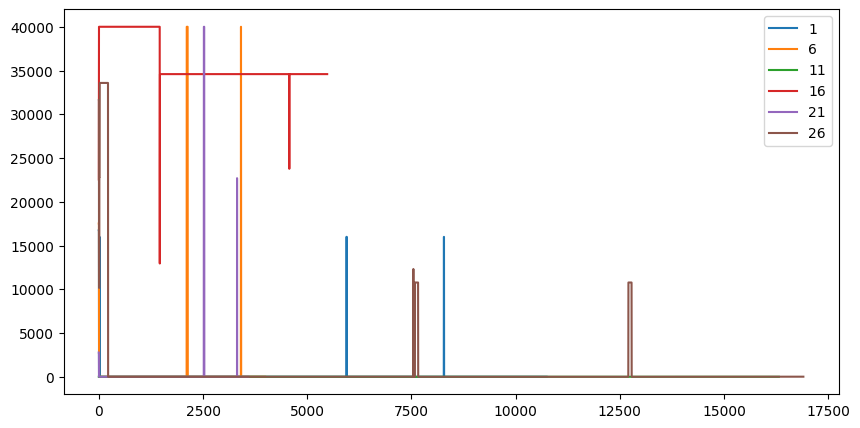

In [47]:
plt.figure(figsize=(10,5))
for k, v in data.items():
    plt.plot(data[k]["abc_0"]["Results"]["graph_structure"].keys(), data[k]["abc_0"]["Results"]["graph_structure"].values(), label=k)
plt.legend()

In [48]:
res_abc = {}

In [50]:
#remove burnin
for k, v in data.items():
    dict_res = data[k]["abc_0"]["Results"]["graph_structure"]
    n_following = 0
    keys_following = []
    
    dict_results_per_no_burnin = dict_res.copy()
    list_keys = list(dict_results_per_no_burnin.keys())

    next_key = 0
    for key, value in dict_res.items():
        if round(value,3) == round(dict_res[next_key],3):
            n_following += 1
            keys_following.append(key)
            try:
                if key == "0":
                    next_key = "0"
                else:
                    next_key = list_keys[list_keys.index(key)-1]
            except IndexError:
                next_key = key
            continue

        else:
            n_following = 0
            if n_following == 0:
                keys_following.append(key)
            if n_following < 5:
                for key in keys_following:
                    dict_results_per_no_burnin.pop(key)
            keys_following = []
            try:
                next_key = list_keys[list_keys.index(key)-1]
            except IndexError:
                next_key = key
            continue
        

    res_abc[k] = dict_results_per_no_burnin

In [52]:
res_abc.keys()

dict_keys([1, 6, 11, 16, 21, 26])

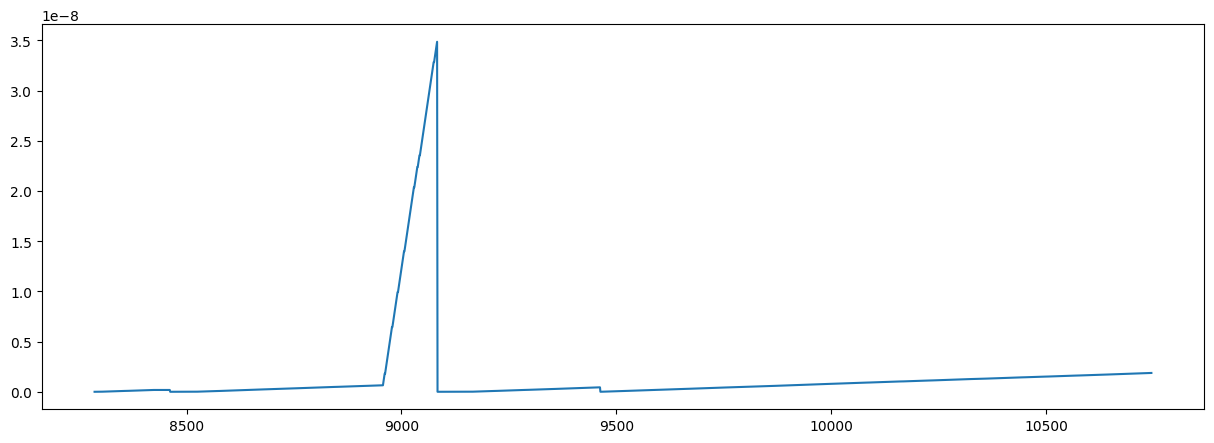

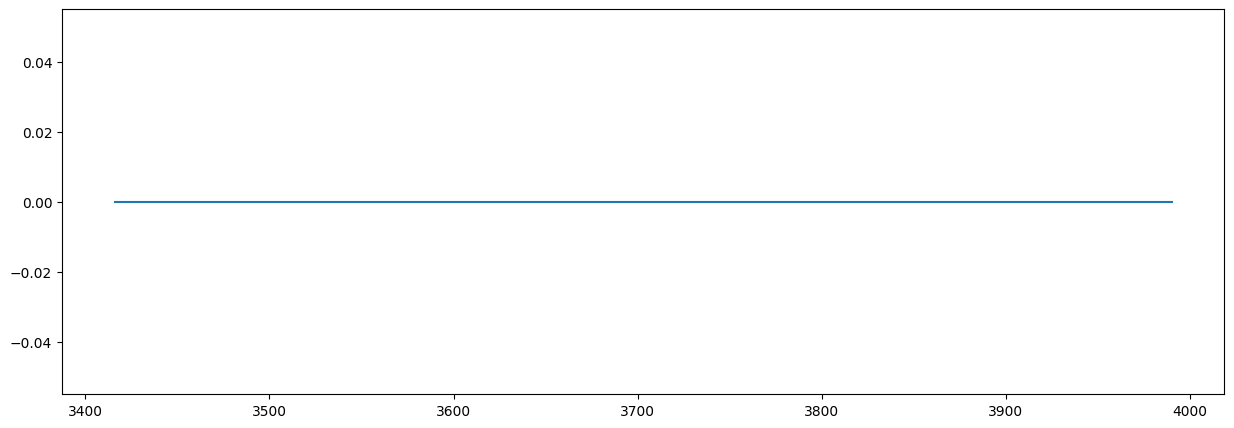

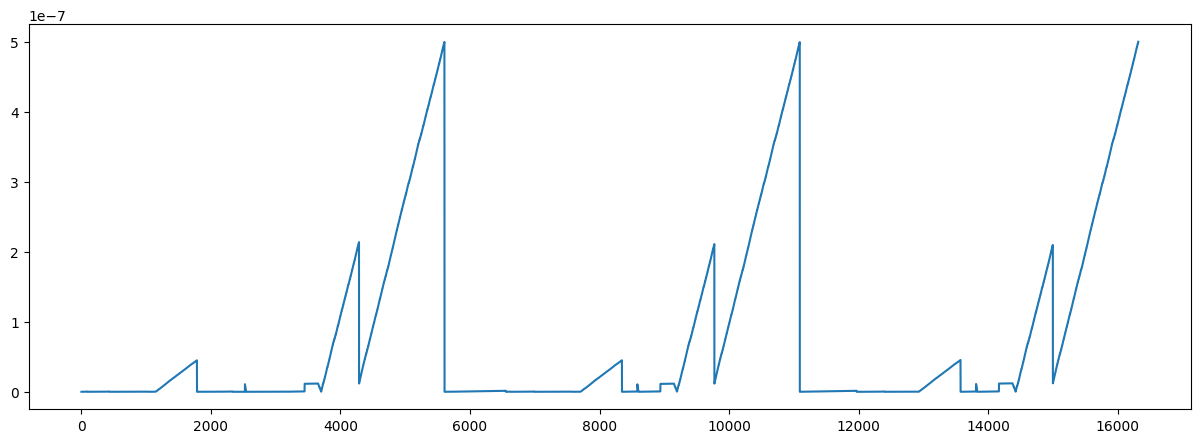

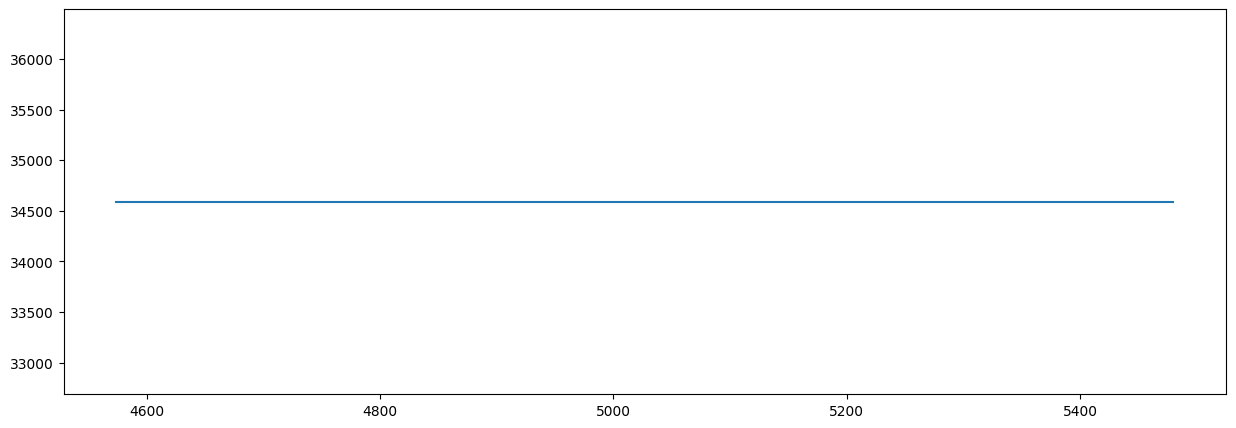

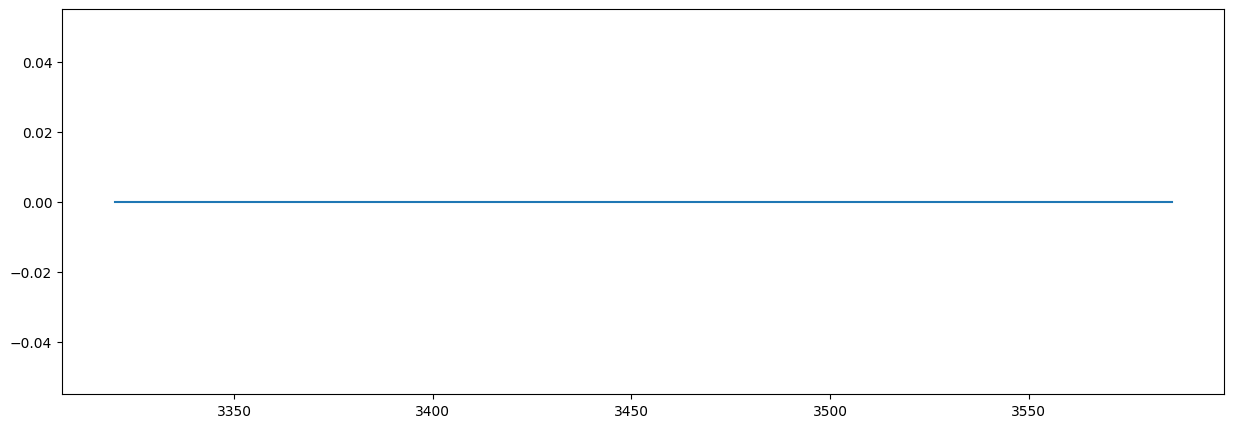

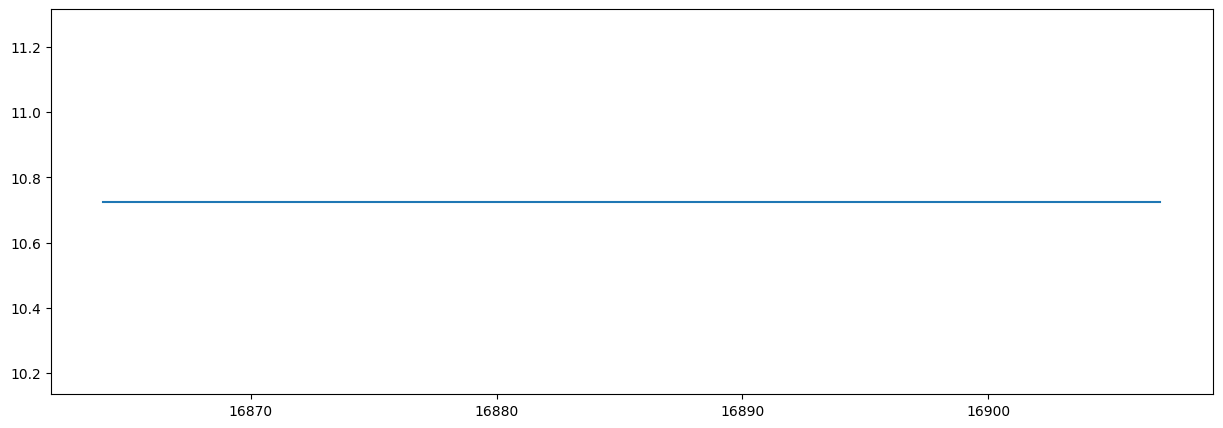

In [55]:
for k, v in res_abc.items():
    plt.figure(figsize=(15,5))
    x_distr = res_abc[k].keys()
    y_distr = res_abc[k].values()

    plt.plot(x_distr, y_distr)

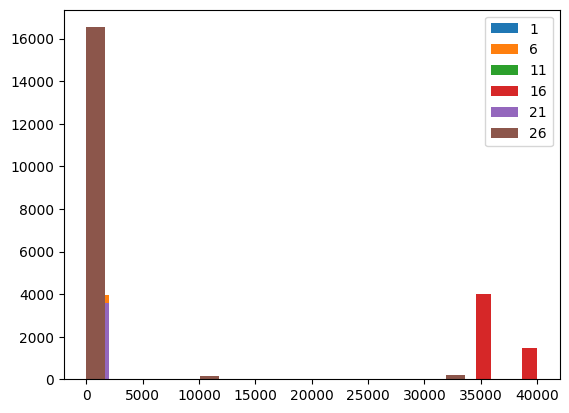

In [33]:
for k, v in data.items():
    plt.hist(data[k]["abc_0"]["Results"]["graph_structure"].values(), label=k, bins=20)
    plt.legend()

In [40]:
from collections import Counter

def find_mode_key_value(dictionary):
    # Use Counter to count occurrences of each value
    value_counts = Counter(dictionary.values())

    # Find the mode(s)
    max_count = max(value_counts.values())
    modes = [key for key, count in value_counts.items() if count == max_count]

    # Find the key-value pair corresponding to the mode
    mode_pair = next((key, value) for key, value in dictionary.items() if value in modes)

    return mode_pair

In [42]:
mode_key_value = find_mode_key_value(data[1]["abc_0"]["Results"]["graph_structure"])

print("Mode Key-Value Pair:", mode_key_value)

Mode Key-Value Pair: (4, 0.0)
